In [ ]:
import pandas as pd
import numpy as np

import keras
from keras.preprocessing.image import ImageDataGenerator, image
from keras.applications import mobilenet_v2
from keras import layers
from keras import models
from tensorflow.keras.models import Sequential, Model
from keras import optimizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam

import math
from sklearn.metrics import confusion_matrix, classification_report

import glob
import os
from pathlib import Path
import shutil

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Start From Here in **Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/smallerdataset/train'
validation_dir = '/content/drive/MyDrive/smallerdataset/validation'
test_dir = '/content/drive/MyDrive/smallerdataset/test'

## First Model Run

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=30,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1199 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
20/20 [==============================] - 133s 6s/step - loss: 0.7087 - acc: 0.5693 - val_loss: 0.6868 - val_acc: 0.5900
Epoch 2/30
20/20 [==============================] - 93s 5s/step - loss: 0.7007 - acc: 0.4753 - val_loss: 0.6838 - val_acc: 0.5700
Epoch 3/30
20/20 [==============================] - 78s 4s/step - loss: 0.6813 - acc: 0.5590 - val_loss: 0.6891 - val_acc: 0.6400
Epoch 4/30
20/20 [==============================] - 61s 3s/step - loss: 0.6894 - acc: 0.5273 - val_loss: 0.6817 - val_acc: 0.6000
Epoch 5/30
20/20 [==============================] - 51s 3s/step - loss: 0.6955 - acc: 0.4542 - val_loss: 0.6701 - val_acc: 0.5700
Epoch 6/30
20/20 [==============================] - 38s 2s/step - loss: 0.6907 - acc: 0.4907 - val_loss: 0.6860 - val_acc: 0.5400
Epoch 7/30
20/20 [==============================] - 36s 2s/step - loss: 0.6639 - acc: 0.6445 - val_loss: 0.6804 - val_acc: 0.6300
Epoch 8/30
20/20 [==============================] - 30s 2s/step - loss: 0.6856 - acc: 0.5

In [ ]:
model.save('first_painting_model.h5')


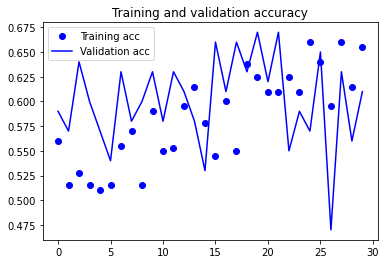

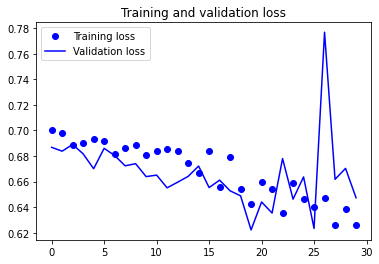

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
prediction = model.predict_classes(validation_generator)

print(confusion_matrix(validation_generator.labels, prediction))
print(classification_report(validation_generator.labels, prediction))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[106  94]
 [ 85 115]]
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       200
           1       0.55      0.57      0.56       200

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



## Second Model Run with Image Augmentation and Dropout

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='wrap')

In [ ]:
train_imp_dir = '/content/drive/MyDrive/smallerdataset/train/impressionism'
train_post_imp_dir = '/content/drive/MyDrive/smallerdataset/train/post_impressionism'

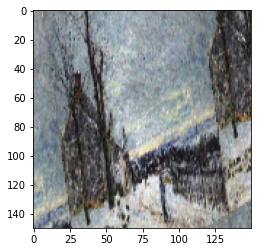

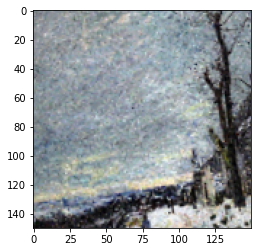

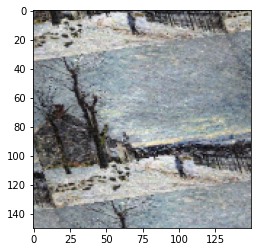

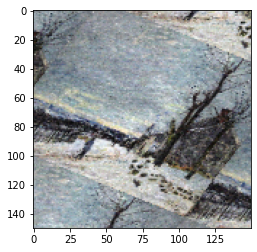

In [ ]:
fnames = [os.path.join(train_imp_dir, fname) for fname in os.listdir(train_imp_dir)]

# We pick one image to "augment"
img_path = fnames[5]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
train_datagen = ImageDataGenerator(
      rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='wrap')

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=30,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=10)

Found 1199 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
20/20 [==============================] - 58s 3s/step - loss: 21.2843 - acc: 0.4653 - val_loss: 0.6911 - val_acc: 0.5100
Epoch 2/30
20/20 [==============================] - 49s 2s/step - loss: 2.8610 - acc: 0.5097 - val_loss: 0.6929 - val_acc: 0.5250
Epoch 3/30
20/20 [==============================] - 49s 2s/step - loss: 1.1833 - acc: 0.5006 - val_loss: 0.6929 - val_acc: 0.5600
Epoch 4/30
20/20 [==============================] - 50s 2s/step - loss: 0.9391 - acc: 0.4820 - val_loss: 0.6929 - val_acc: 0.5950
Epoch 5/30
20/20 [==============================] - 49s 2s/step - loss: 0.7832 - acc: 0.4957 - val_loss: 0.6928 - val_acc: 0.5900
Epoch 6/30
20/20 [==============================] - 48s 2s/step - loss: 0.7539 - acc: 0.5476 - val_loss: 0.6931 - val_acc: 0.5200
Epoch 7/30
20/20 [==============================] - 48s 2s/step - loss: 0.7198 - acc: 0.5486 - val_loss: 0.6935 - val_acc: 0.4700
Epoch 8/30
20/20 [==============================] - 49s 2s/step - loss: 0.7199 - acc: 0.5

In [ ]:
model.save('second_painting_model.h5')


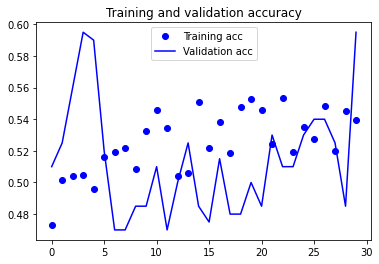

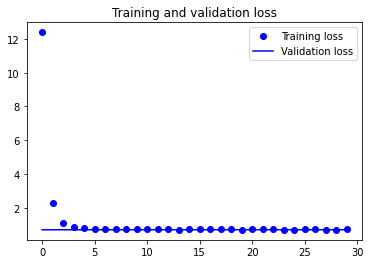

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
prediction = model.predict_classes(validation_generator)

print(confusion_matrix(validation_generator.labels, prediction))
print(classification_report(validation_generator.labels, prediction))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[ 96 104]
 [ 93 107]]
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       200
           1       0.51      0.54      0.52       200

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400

